In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

/Users/zhangyuchen/miniforge3/envs/yuki/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_path = 'data/train.csv'
test_path = 'data/test.csv'

In [3]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# Drop duplicates & missing data

In [4]:
isDuplicated = train.duplicated()
print('Shape of duplicated data:', train[isDuplicated].shape)
train = train.drop_duplicates()

Shape of duplicated data: (315, 17)


In [5]:
print('Missing data of each field:')
print(train.isnull().sum())

Missing data of each field:
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
eco_category           0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
resale_price           0
dtype: int64


# Split X and Y

In [6]:
y_train = train.iloc[:,-1]
X_train = train.iloc[:,:-1]
X_test = test.copy()

# EDA

In [7]:
ylabel = 'resale_price'
all_features = list(X_train.columns)
numerical_features = list(X_train.select_dtypes(include = ['int64','float']))
nominal_features = list(X_train.select_dtypes(include=['object']))
print('Numerical Features: {}\n\nNominal Features: {}'.format(numerical_features, nominal_features))

Numerical Features: ['floor_area_sqm', 'lease_commence_date', 'latitude', 'longitude', 'elevation']

Nominal Features: ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model', 'eco_category', 'subzone', 'planning_area', 'region']


In [15]:
train.describe()

,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,resale_price
count,431417.000000,431417.000000,431417.000000,431417.000000,431417.0,4.314170e+05
mean,96.975830,1989.420308,1.364937,103.836488,0.0,3.018208e+05
std,25.191554,10.252353,0.042829,0.073527,0.0,1.298672e+05
min,31.000000,1966.000000,1.270380,103.685228,0.0,2.970000e+04
25%,74.000000,1983.000000,1.336154,103.772432,0.0,2.052000e+05
50%,99.000000,1988.000000,1.358958,103.840160,0.0,2.839500e+05
75%,114.000000,1997.000000,1.389004,103.895779,0.0,3.735000e+05
max,280.000000,2019.000000,1.457071,103.987805,0.0,1.123200e+06


In [16]:
train[nominal_features].describe()

,month,town,flat_type,block,street_name,storey_range,flat_model,eco_category,subzone,planning_area,region
count,431417,431417,431417,431417,431417,431417,431417,431417,431417,431417,431417
unique,251,26,12,2472,1103,25,20,1,155,32,5
top,2010-07,woodlands,4 room,1,yishun ring road,04 to 06,model a,uncategorized,tampines east,woodlands,west region
freq,2925,39233,135580,1669,4387,107171,127446,431417,19549,39233,109319


In [17]:
test.describe()

,floor_area_sqm,lease_commence_date,latitude,longitude,elevation
count,107934.000000,107934.000000,107934.000000,107934.000000,107934.0
mean,96.919316,1989.383234,1.364674,103.836650,0.0
std,25.180335,10.275848,0.042685,0.073675,0.0
min,31.000000,1966.000000,1.270380,103.685228,0.0
25%,73.000000,1982.000000,1.335985,103.772219,0.0
50%,99.000000,1988.000000,1.358728,103.840502,0.0
75%,114.000000,1997.000000,1.388634,103.896374,0.0
max,297.000000,2019.000000,1.457071,103.987805,0.0


In [18]:
test[nominal_features].describe()

,month,town,flat_type,block,street_name,storey_range,flat_model,eco_category,subzone,planning_area,region
count,107934,107934,107934,107934,107934,107934,107934,107934,107934,107934,107934
unique,251,26,12,2446,1092,24,20,1,155,32,5
top,2010-07,woodlands,4 room,1,yishun ring road,04 to 06,model a,uncategorized,tampines east,woodlands,west region
freq,729,9603,33940,431,1129,26992,31874,107934,4966,9603,27581


In [19]:
def data_boxplot(data, features, y=None, row=2, col=3):
    fig=plt.figure(figsize=(10,6))
    i=1
    for f in features:
        x = plt.subplot(row, col, i)
        x.boxplot(data[f])
        plt.title(f)
        i+=1
    if y:
        x = plt.subplot(row, col, i)
        x.boxplot(data[y])
        plt.title(y)
    plt.tight_layout()

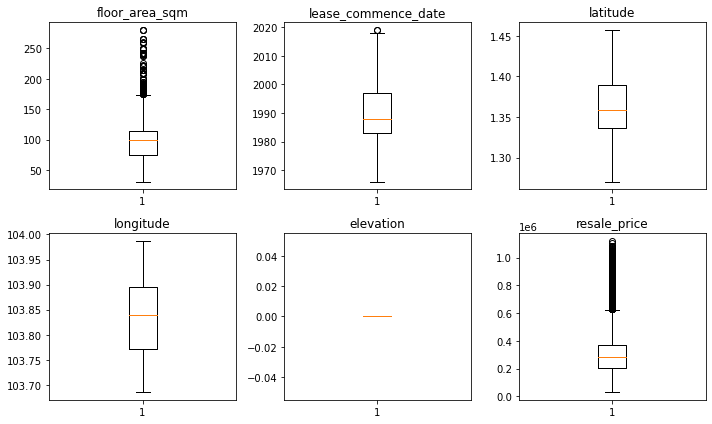

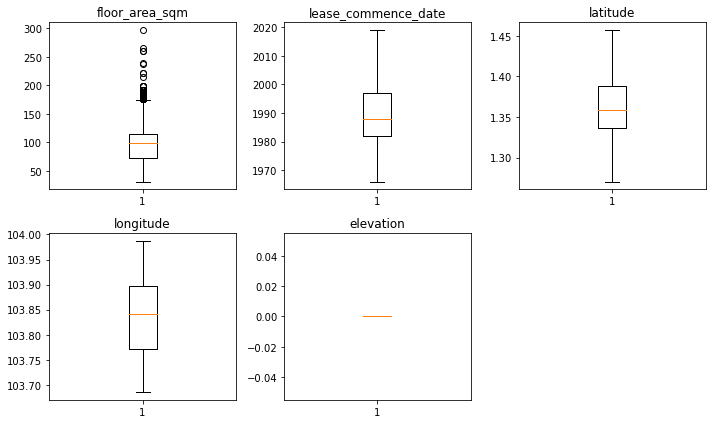

In [20]:
data_boxplot(train, numerical_features, ylabel)        
data_boxplot(test, numerical_features)

In [21]:
def data_distplot(data, features, y=None, row=2, col=3):
    fig=plt.figure(figsize = (10,6))
    i = 1
    for feature in features:
        x = plt.subplot(row, col, i)
        sns.distplot(data[feature])
        i += 1
    if y:
        x = plt.subplot(row, col, i)
        sns.distplot(data[y])
    plt.tight_layout() 

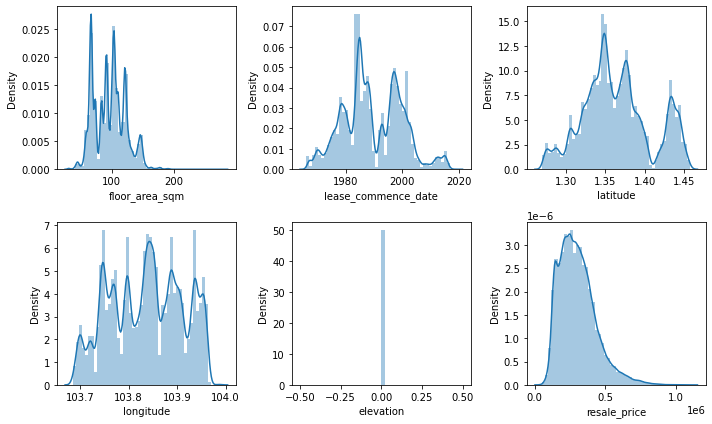

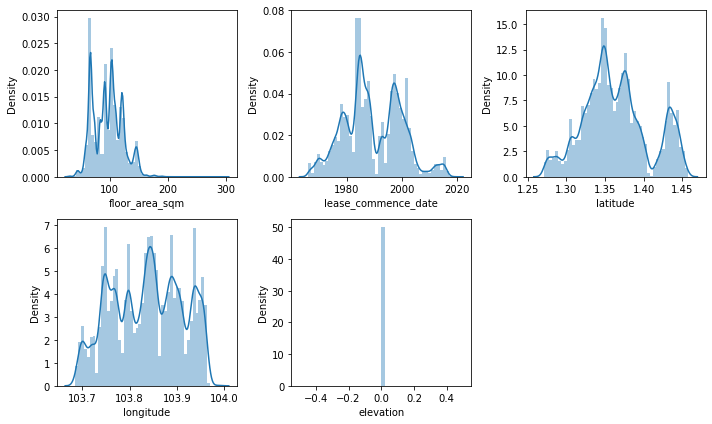

In [22]:
data_distplot(train, numerical_features, ylabel)
data_distplot(test, numerical_features)

## Do feature transformation before multivariate analysis

In [8]:
print('Number of categories for nominal features:')
X_train[nominal_features].describe().loc['unique']

Number of categories for nominal features:


month             251
town               26
flat_type          12
block            2472
street_name      1103
storey_range       25
flat_model         20
eco_category        1
subzone           155
planning_area      32
region              5
Name: unique, dtype: object

In [9]:
def block_to_num(blk): 
    return int(''.join(list(filter(str.isdigit, blk))))

X_train['block'] = X_train['block'].apply(lambda x: block_to_num(x))
X_test['block'] = X_test['block'].apply(lambda x: block_to_num(x))

In [10]:
# month to month & year
def month_year(data):
    data['year'] = data['month'].apply(lambda x: x.split('-')[0]).astype('int')
    data['mth'] = data['month'].apply(lambda x: x.split('-')[1]).astype('int')
    # data = data.drop('month', axis=1)
    return data

X_train = month_year(X_train)
X_test = month_year(X_test)

In [11]:
# reference: https://www.hdb.gov.sg/residential/buying-a-flat/finding-a-flat/types-of-flats
def flat_type_to_num(ft):
    if ft=='executive':
        return 6
    elif ft=='multi generation':
        return 7
    else:
        return int(ft.replace('-',' ').split(' ')[0])

X_train['flat_type'] = X_train['flat_type'].apply(lambda x: flat_type_to_num(x))
X_test['flat_type'] = X_test['flat_type'].apply(lambda x: flat_type_to_num(x))

In [12]:
# storey_range
def storey_range_to_num(sr):
    temp = sr.split(' to ')
    return (int(temp[0])+int(temp[1]))//2

X_train['storey_range'] = X_train['storey_range'].apply(lambda x: storey_range_to_num(x))
X_test['storey_range'] = X_test['storey_range'].apply(lambda x: storey_range_to_num(x))

In [13]:
# Target Encoding
target_features = ['street_name', 'flat_model', 'subzone', 'planning_area', 'town']

import category_encoders as ce
target_encoder = ce.TargetEncoder(cols=target_features)
target_encoder.fit(X_train, y_train)

# transform the training and test data
X_train = target_encoder.transform(X_train)
X_test = target_encoder.transform(X_test)


In [14]:
# One-hot encoding 
onehot_features = ['region']

X_train = pd.get_dummies(X_train, columns=onehot_features)
X_test = pd.get_dummies(X_test, columns=onehot_features)

# keep only the common columns in the training and test data
common_columns = X_train.columns.intersection(X_test.columns)
X_train = X_train[common_columns]
X_test = X_test[common_columns]

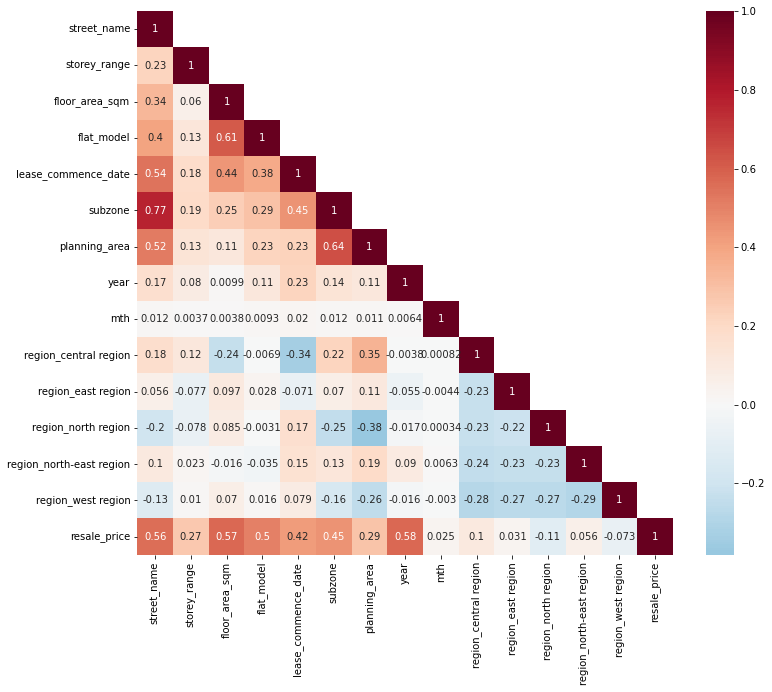

In [26]:
def bivariate_analysis(data):
    corr = data.corr() # correlation coefficient matrix
    mask = np.array(corr)
    mask[np.tril_indices_from(mask)] = False
    plt.subplots(figsize=(12,10))
    sns.heatmap(corr, annot=True, mask=mask, cmap= "RdBu_r", center=0)

bivariate_analysis(pd.concat([X_train, y_train], axis=1))

In [24]:
# Perform Feature Selection
drop_features = ['elevation', 'eco_category', 'latitude', 'longitude', 'town', 'block', 'month', 'flat_type']
X_train.drop(drop_features, axis=1, inplace=True)
X_test.drop(drop_features, axis=1, inplace=True)

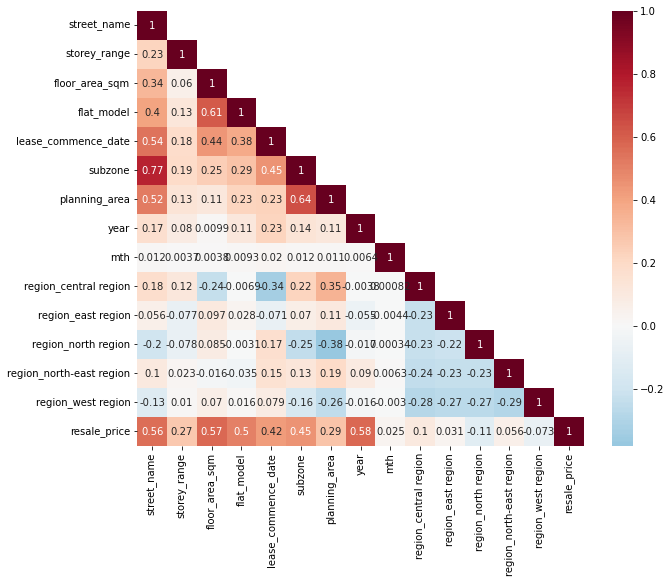

In [25]:
bivariate_analysis(pd.concat([X_train, y_train], axis=1))